In [2]:
from fastai.vision.all import *

In [4]:
!pip install duckduckgo_search
from duckduckgo_search import DDGS #DuckDuckGo has changed the api so we need to update 
from fastcore.all import *

def search_images(keywords, max_images=200): return L(DDGS().images(keywords, max_results=max_images)).itemgot('image')
import time, json

In [ ]:
searches = "spaghetti","macaroni"
path = Path('pasta')
for search in searches:
    dest = (path/search)
    dest.mkdir(exist_ok=True, parents=True)
    urls = search_images(f"{search} pasta", max_images=40)
    download_images(dest, urls=urls)
    time.sleep(5)
    resize_images(dest, max_size=400, dest=dest)

In [30]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

1

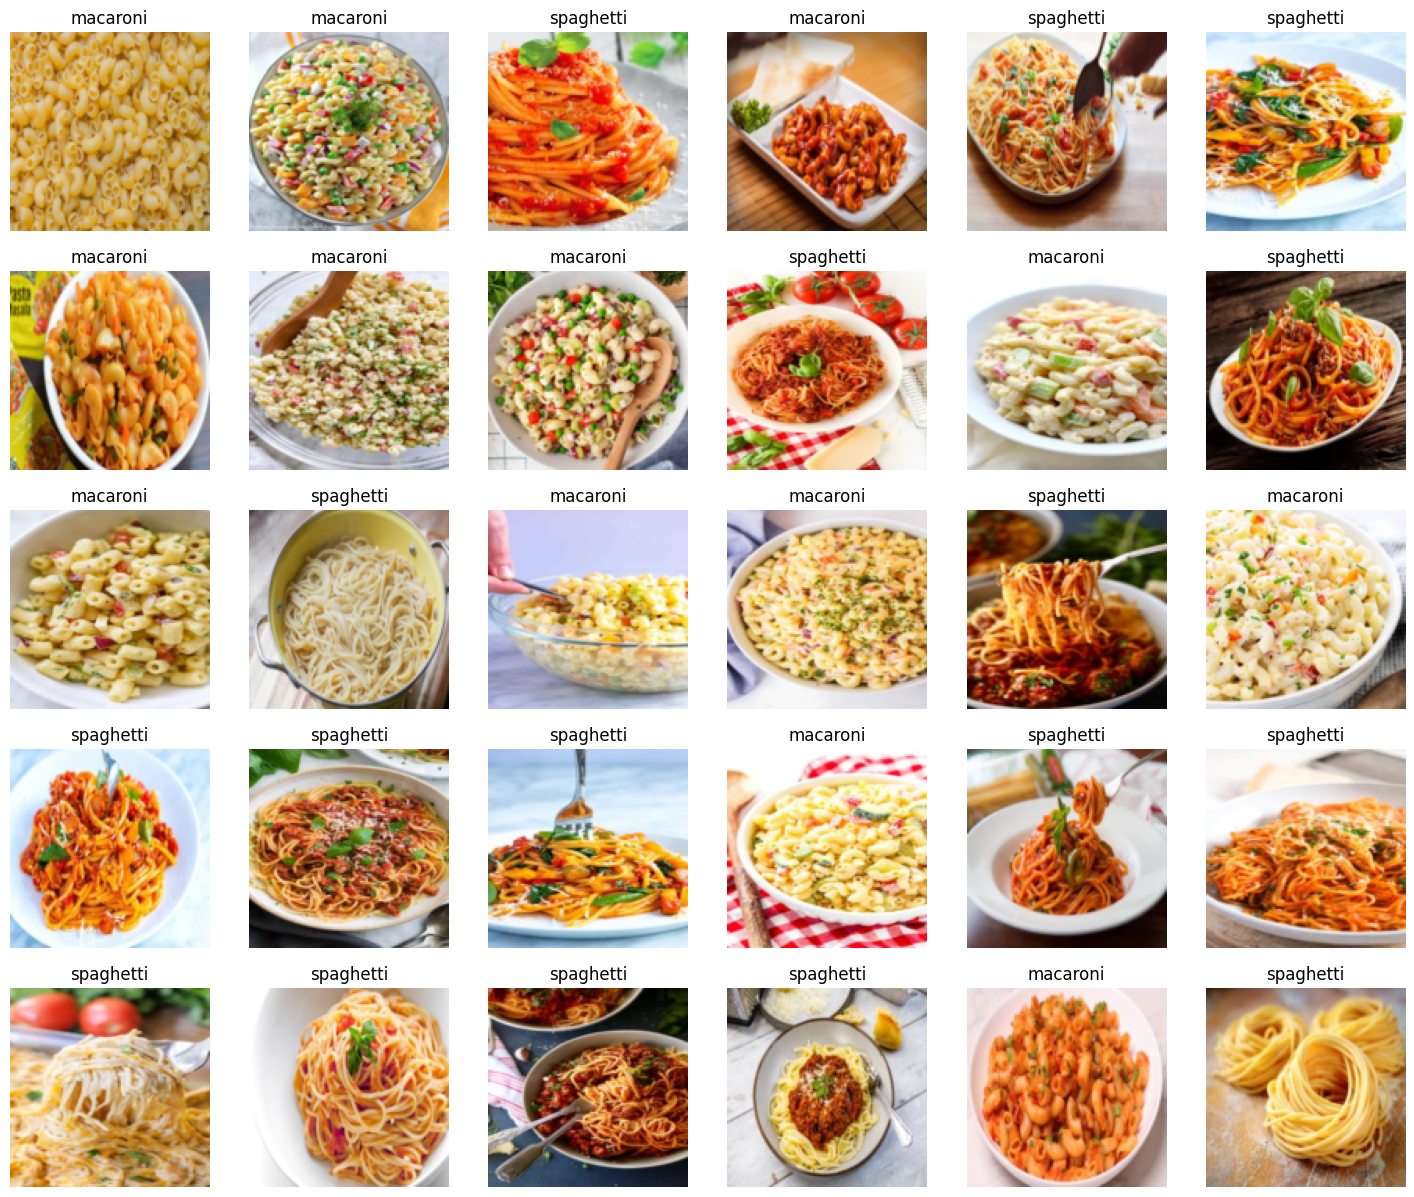

In [36]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128, ResizeMethod.Squish)
).dataloaders(path, bs=32)
dls.show_batch(max_n=30)

In [39]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(10)

epoch,train_loss,valid_loss,error_rate,time
0,1.252351,1.152795,0.538462,00:00


epoch,train_loss,valid_loss,error_rate,time
0,0.958448,0.932396,0.538462,00:00
1,0.904991,0.823485,0.461538,00:00
2,0.826120,0.569570,0.230769,00:00
3,0.723694,0.328360,0.153846,00:00
4,0.597064,0.275463,0.076923,00:00
5,0.513181,0.278752,0.076923,00:00
6,0.457286,0.291239,0.076923,00:00
7,0.400337,0.299165,0.076923,00:00
8,0.353222,0.288522,0.076923,00:00
9,0.319624,0.275061,0.076923,00:00
